In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX


from sklearn.metrics import mean_squared_error
from math import sqrt

In [10]:
df = pd.read_excel(r'C:\Users\Maite\Downloads\consumo-de-electricidad-en-centros-de-la-administracion-autonomica-de-castilla-y.xlsx', parse_dates=True)
df.head()

,TIPO DE CENTRO DE CONSUMO,MUNICIPIO,PROVINCIA,TIPO SUMINISTRO ELÉCTRICO,FECHA,CONSUMO MENSUAL ENERGÍA ACTIVA (kWh),P1 (kW),P2 (kW),P3 (kW),P4 (kW),P5 (kW),P6 (kW),Unnamed: 12,Unnamed: 13,Unnamed: 14,Municipio,Cod_Municipio,Provincia
0,EDIFICIO CALEFACTADO,VALLADOLID,VALLADOLID,Principal,2024-06,38288,254.0,254.0,254.0,254.0,254.0,345.0,NaN,NaN,NaN,ALDEANUEVA DE SANTA CRUZ,7.0,ÁVILA
1,EDIFICIO CALEFACTADO,VALLADOLID,VALLADOLID,Principal,2024-06,24574,80.0,80.0,80.0,80.0,122.0,140.0,NaN,NaN,NaN,AVEINTE,17.0,ÁVILA
2,DELEGACION TERRITORIAL,SALAMANCA,SALAMANCA,Principal,2024-06,101265,396.0,396.0,396.0,396.0,396.0,680.0,NaN,NaN,NaN,AVELLANEDA,18.0,ÁVILA
3,DELEGACION TERRITORIAL,SORIA,SORIA,Principal,2024-06,38922,180.0,180.0,180.0,180.0,180.0,451.0,NaN,NaN,NaN,ÁVILA,19.0,ÁVILA
4,NaN,VALLADOLID,VALLADOLID,Principal,2024-06,43191,380.0,380.0,380.0,380.0,380.0,380.0,NaN,NaN,NaN,BERROCALEJO DE ARAGONA,30.0,ÁVILA


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121077 entries, 0 to 121076
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   TIPO DE CENTRO DE CONSUMO             120425 non-null  object 
 1   MUNICIPIO                             121077 non-null  object 
 2   TIPO SUMINISTRO ELÉCTRICO             121077 non-null  object 
 3   FECHA                                 121077 non-null  object 
 4   CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)  121077 non-null  int64  
 5   P1 (kW)                               121077 non-null  float64
 6   P2 (kW)                               121077 non-null  float64
 7   P3 (kW)                               82320 non-null   float64
 8   P4 (kW)                               82320 non-null   float64
 9   P5 (kW)                               82320 non-null   float64
 10  P6 (kW)                               82320 non-null   float64
dtype

In [12]:
df['FECHA'] = pd.to_datetime(df['FECHA'])

In [11]:
df_model = df[['FECHA','CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)']].copy()
df_model.head()

,FECHA,CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)
0,2024-06-01,38288
1,2024-06-01,24574
2,2024-06-01,101265
3,2024-06-01,38922
4,2024-06-01,43191


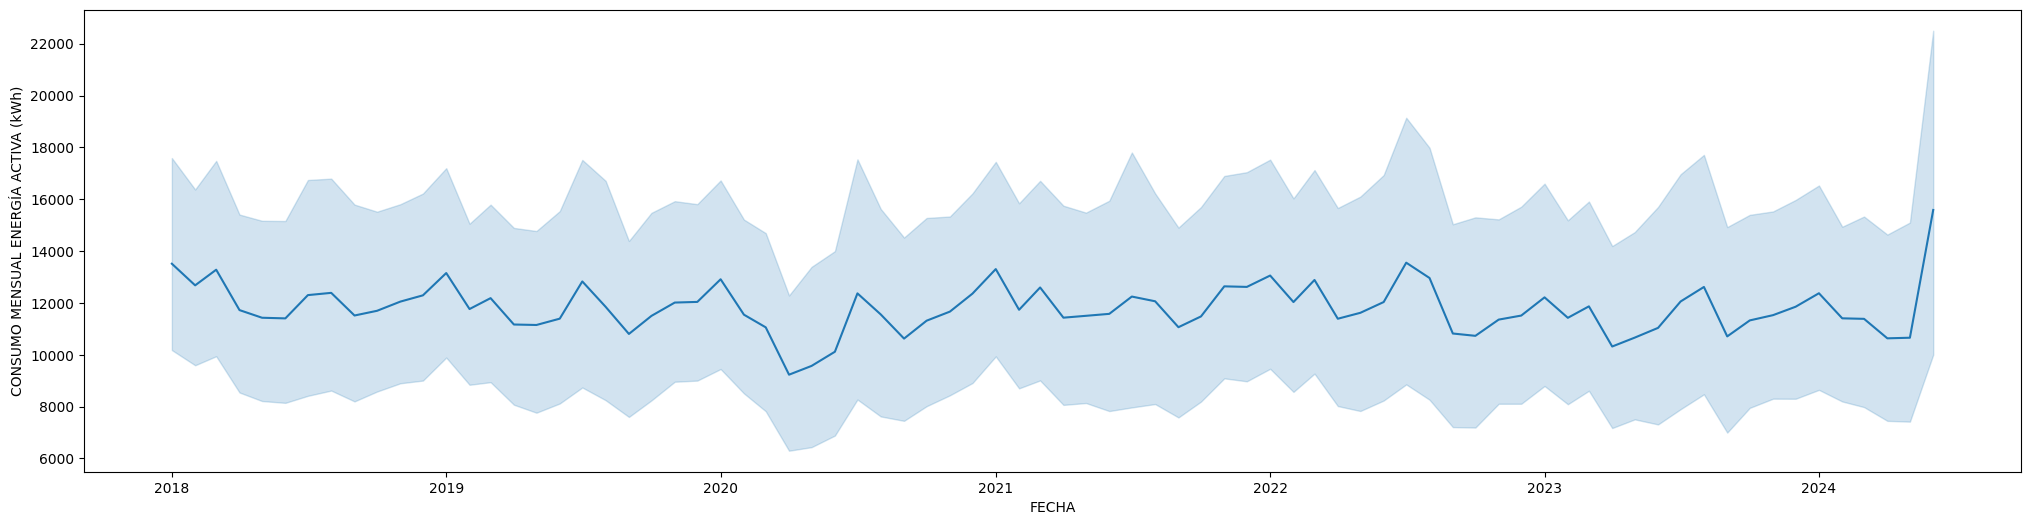

In [20]:
plt.figure(figsize=(25,6))
sns.lineplot(x=df_model['FECHA'], y=df_model['CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)'])
plt.show()

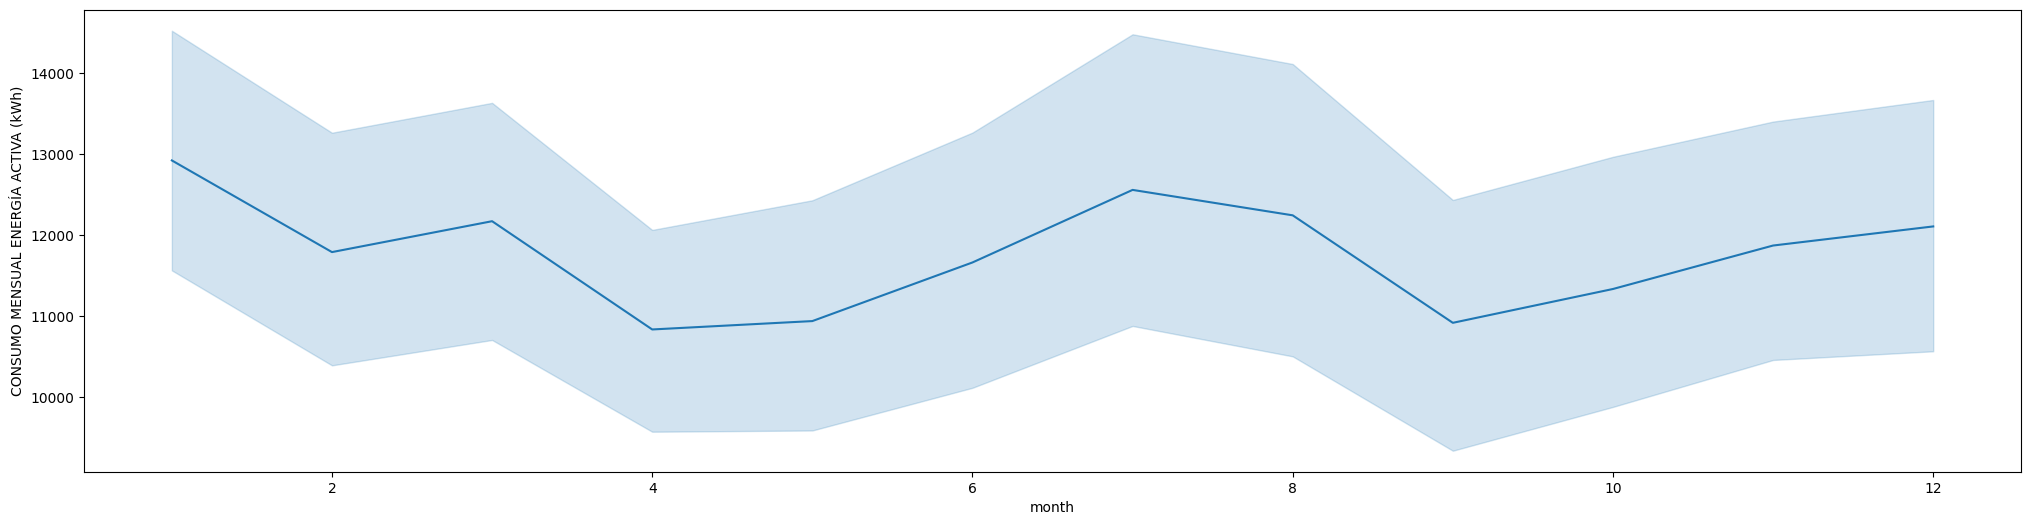

In [34]:
df_model['month'] = df_model['FECHA'].dt.month
df_model['year'] = df_model['FECHA'].dt.year

plt.figure(figsize=(25,6))
sns.lineplot(x=df_model['month'], y=df_model['CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)'])
plt.show()


In [24]:
split_date = '2023-05'
split_date = pd.to_datetime(split_date)
training = df[df['FECHA'] < split_date]
test = df[df['FECHA'] > split_date]